# 머신러닝의 의미

- 머신러닝은 데이터의 훈련 샘플들을 학습해 데이터의 규칙과 패턴을 학습하여 결과를 예측하는 알고리즘과 시스템을 연구하는 분야
- 파이썬 API 기반 라이브러리로 손쉽게 모델링 구축 및 데이터 패턴 자동 학습 가능

## 머신러닝 분석 프로세스 설명
<img src="img/05-01.png" width="800"/>

### 데이터 확인
- 종속변수 / 독립변수 확인
- 적용 가능한 분석모델 확인
    - 종속변수가 연속형 -> 회귀분석, 범주형 -> 분류분석
    - 종속변수가 없는 데이터 -> 비지도 학습

### 데이터 분할
- train (학습) / validation (검증) / test (평가) data 로 분할
- 학습 : 60~80%, 검증 : 10~20%, 평가 : 10~20%
- 하나의 학습/검증/평가 데이터 셋으로는 과적합 발생 가능성 높음 
  - 교차검증 적용 필요 (cross validation)

### 전처리
- 데이터의 특성에 따라 분석이 가능한 형태로 변형하는 단계
- 결측치, 이상치 처리
- 독립변수가 범주형 데이터 
  - One-hot encoding (데이터 분할 전에 수행)
- 정규화, 표준화


### 모델학습
- 머신러닝 알고리즘을 학습데이터세트에 적용
- 데이터 확인 단계에서 파악한 분석방법에 따라 사이킷런에서 머신러닝 알고리즘 객체 생성
- 분석 목표, 데이터 특성에 따라, 지도학습(회귀, 분류)과 비지도 학습으로 분류
- 학습 -> 검증을 반복하며 하이퍼파라미터 튜닝

### 성능평가
- 최적의 하이퍼파라미터 및 최종모델 결정
- 최종모델에 평가데이터세트를 적용하여 알고리즘 예측성능 평가

<img src="img/05-02.png" width="800"/>

## 머신러닝 분석과정 빠르게 맛보기 - 회귀분석
- 보스턴 주택가격 데이터로 회귀분석 연습
- 500개의 레코드
- 보스턴 주택가격(Price)를 종속변수로, 나머지를 독립변수로 설정



### 데이터 확인
- 데이터를 load_boston 함수로 불러 온다
- data와 target으로 DataFrame 을 만든다.

In [55]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<img src="img/05-17.png" width="800"/>

- info와 shape을 통해 데이터의 형태, 타입을 확인한다
- 506개 행과 14개의 컬럼을 가지고 있다.

In [56]:
df.shape

(506, 14)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- 결측치 파악
- 결측치가 없다.

- CHAS와 PRICE 변수를 제외한 12개 변수들간와 가격간의 상관관계 시각화
- seaborn의 regplot을 통해 산점도와 회귀직선 동시 표시
- matplotlib의 plt.subplots()를 통해 3x4 이미지 만들기
- constrained_layout =True 옵션으로 그래프 사이의 간격을 자동으로 설정

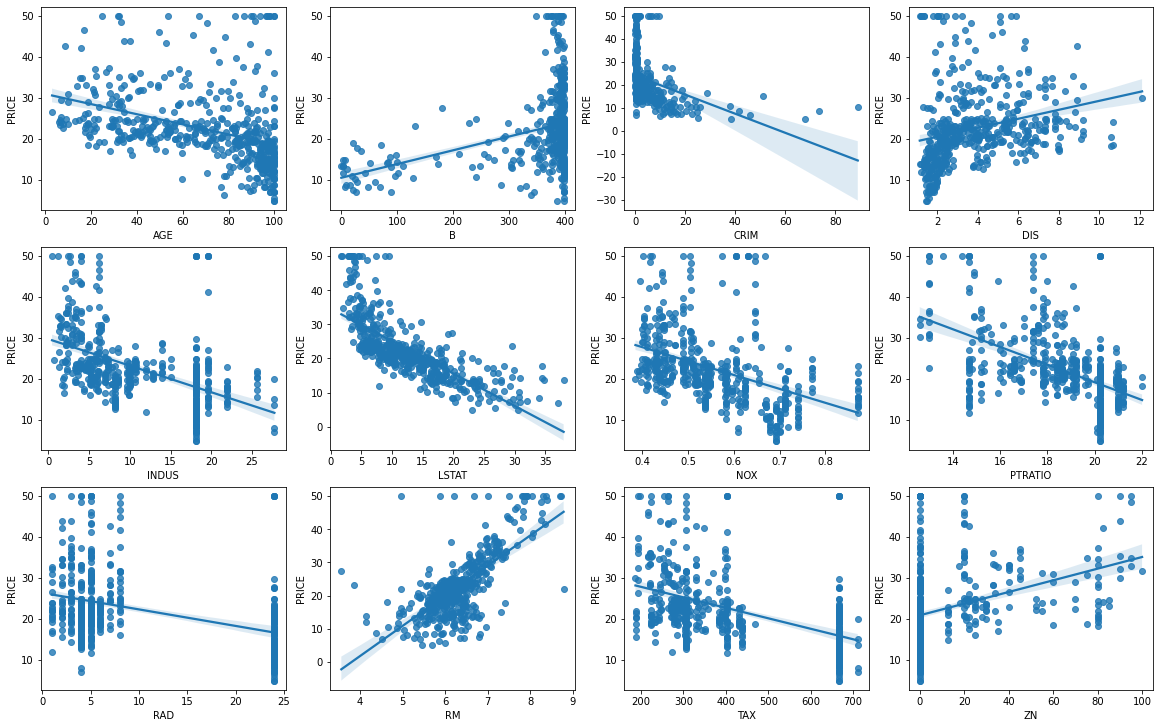

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot그리기
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,10), layout="constrained")
features = df.columns.difference(['PRICE', 'CHAS'])

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axs[row][col])
# plt.tight_layout()    
plt.show()

### 데이터 분할
- 독립 변수는 CHAS와 PRICE를 제외한 모든 변수, 종속 변수는 PRICE
- 8:2의 비율로 학습/평가 세트로 분할
- train_test_split() 사용

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(['PRICE', 'CHAS'], axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [61]:
print('학습 데이터세트 PRICE 평균', y_train.mean())
print('평가 데이터세트 PRICE 평균', y_test.mean())

학습 데이터세트 PRICE 평균 22.79653465346535
평가 데이터세트 PRICE 평균 21.488235294117654


### 전처리
- Min-max scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 모델학습
- LinearRegression 사용

In [64]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

- linear_reg 모델의 predict() 로 학습용 데이터에 대한 예측 성능 평가
- mae, mse, rmse, r2_score(결정계수) 사용

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred_train = linear_reg.predict(X_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.32616
MSE: 22.11246
RMSE: 4.70239
R2: 0.74546


### 회귀모델 성능 측정 지표

#### MSE(Mean Squared Error)
<img src="img/05-04.png" width="800"/>

#### RMSE(Root Mean Squared Error)
<img src="img/05-05.png" width="800"/>

#### MSLE(Mean Squared Log Error)
<img src="img/05-06.png" width="800"/>

#### MAPE(Mean Absolute Percentage Error)
<img src="img/05-07.png" width="800"/>

### 성능평가 및 예측값 저장
- 테스트 세트를 학습용 데이터에서 사용한 scaler로 변환
- linear_reg로 테스트 세트를 예측

In [66]:
X_test_scaled = scaler.transform(X_test)
pred = linear_reg.predict(X_test_scaled)

- pred와 y_test를 비교하여 예측 성능 평가

In [67]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.23724
MSE: 24.63539
RMSE: 4.96341
R2: 0.66406


- 실제 값과 예측 결과를 비교

In [68]:
df_result = pd.DataFrame({'actual Price':y_test,'pred Price':pred})
df_result.head(3)

,actual Price,pred Price
173,23.6,29.218660
274,32.4,33.551467
491,13.6,14.810658


- 테스트 세트, 예측과 실제 값의 시각화

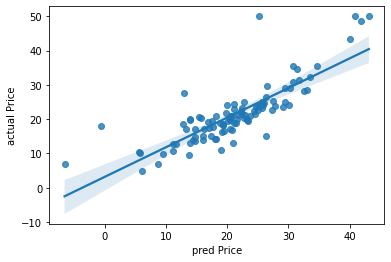

In [69]:
sns.regplot(x='pred Price', y='actual Price', data=df_result);

## 머신러닝 분석과정 빠르게 맛보기 - 분류분석
- iris 데이터를 사용하여 분류분석
- iris 데이터는 꽃잎의 각 부분의 너비와 길이등을 측정한 150개의 레코드로 구성된 데이터
- Species가 종속변수, 나머지가 독립 변수



### 데이터 확인

In [70]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal length','sepal width','petal length','petal width']
df['species'] = iris.target
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- 0은 Setosa, 1은 Versicolor, 2는 Verginica를 의미

In [71]:
df['species'].unique()

array([0, 1, 2])

In [72]:
df.shape

(150, 5)

- 독립 변수는 모두 연속형

### 데이터 분할
- iris데이터는 150 행으로 데이터 크기는 작은 편
- 학습/평가 세트의 비율을 8:2로 나눈 후, 학습 세트로 교차 검증 하는 방식으로 적은 데이터 문제에 대응
- 학습 데이터 세트로 10회 k-fold 교차 검증 (각 검증의 평균)
- train_test_split() 의 옵션에서 stratify 설정을 하여 종속변수의 label 비율을 유지하며 데이터 세트 분할

<img src="img/05-18.png" width="800"/>

In [73]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 전처리
- 독립 변수는 모두 연속형
- 비슷한 크기의 값으로 표준화나 정규화는  하지 않는다

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- 결측치도 존재하지 않아 따로 처리 하지 않는다.

In [75]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

### 모델학습
- DecisionTreeClassifier 사용
- max_depth를 1,3,5 로 설정하여 분석 및 비교 평가

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)
dt_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dt_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)

- cross_val_score 로 k-fold 교차 검증
- k는 10 (cv =10), 평가 지표는 'accuracy'

In [77]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dt_clf_1, X_train, y_train, cv=10, scoring='accuracy')
print("평균 교차검증 정확도 : ", np.round(np.mean(scores), 3))

평균 교차검증 정확도 :  0.667


In [78]:
scores = cross_val_score(dt_clf_3, X_train, y_train, cv=10, scoring='accuracy')
print("평균 교차검증 정확도 : ", np.round(np.mean(scores), 3))

평균 교차검증 정확도 :  0.925


In [79]:
scores = cross_val_score(dt_clf_5, X_train, y_train, cv=10, scoring='accuracy')
print("평균 교차검증 정확도 : ", np.round(np.mean(scores), 3))

평균 교차검증 정확도 :  0.942


- 트리의 깊이를 5로 설정한 모델의 평균 교차검증 정확도가 가장 높음
- 해당 모델로 평가 데이터 세트를 적용 모델 평가

### 성능평가 및 예측값 저장
- 선택한 모델의 fit() 함수로 학습 데이터 전체를 학습 시킨다.
- predict() 함수로 테스트 데이터를 예측하고 
- accuracy_score 함수로 평가 한다.

In [80]:
dt_clf_5.fit(X_train, y_train)
pred = dt_clf_5.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print("의사결정나무(교차검증 후) 예측 정확도 : {0:.5f}".format(accuracy_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도 : 0.96667


- 실젯값과 예측 결과를 DataFrame으로 구성

In [82]:
result = pd.DataFrame({'actual Species':y_test, 'pred Species':pred})
result.head()

,actual Species,pred Species
36,0,0
55,1,1
44,0,0
134,2,2
39,0,0


- 결과를 파일로 저장

In [83]:
#result.to_csv('result.csv', index=False, encoding='utf-8')

## 분류분석
- 실제분류와 예측 분류가 얼마나 일치 하였는가를 기반으로 알고리즘 성능 평가
- 이진분류에서 단순히 정확도만으로 모델을 평가하면 잘못된 평가 결과를 가질 수 있다.



### 정확도
<img src="img/05-08.png" width="800"/>

- class가 매우 불균형 할 경우, 다수를 차지하는 class를 무조건 선택 하는 것 만으로 정확도를 올릴 수 있다.
- 정확도의 한계점을 보완하기 위헤 다음의 다양한 지표가 사용된다.


### 혼동행렬(Confusion Matrix)


<img src="img/05-09.png" width="800"/>

- 혼동행렬 4분면

<img src="img/05-10.png" width="800"/>

- 혼동행렬 4분면의 의미

<img src="img/05-11.png" width="800"/>



### 정밀도(Precision)과 재현율(Recall)
- 정밀도와 재현율은 Positive 데이터 예측에 집중한 성능평가 지표

#### 정밀도

<img src="img/05-12.png" width="800"/>

#### 재현율

<img src="img/05-13.png" width="800"/>

#### 정밀도와 재현율의 상충관계(Trade-off)
- 분류 결정 임곗값(Threshold)을 조정하여 정밀도 또는 재현율의 수치 조절 가능
- 어느 한쪽을 강제로 높이면 다른 하나가 떨어짐
- 어느 한쪽을 강조 하기 보단 적절한 조화를 이루어 종합적으로 분류 모델의 성능을 평가 해야

### F1 score

<img src="img/05-14.png" width="800"/>

### ROC 곡선과 AUC 스코어
 
#### ROC 곡선 

<img src="img/05-15.png" width="800"/>
<img src="img/05-15-02.png" width="800"/>

#### AUC 스코어

<img src="img/05-16.png" width="800"/>